In [12]:
import pandas as pd
from prophet import Prophet

In [13]:
df = pd.read_csv('./iss-data/csv/us_weekly_consumable_water_summary_20220102-20230903.csv', usecols=['Date', 'Corrected Potable (L)'])

In [14]:
df['Date'] = pd.to_datetime(df.Date)

In [15]:
df.head()

,Date,Corrected Potable (L)
0,2022-01-14,2420.0
1,2022-01-21,2418.0
2,2022-01-28,2416.0
3,2022-02-04,2392.0
4,2022-02-11,2290.0


In [18]:
df_prophet = df.rename(columns={'Date': 'ds', 'Corrected Potable (L)': 'y'})

In [19]:
df_prophet.head()

,ds,y
0,2022-01-14,2420.0
1,2022-01-21,2418.0
2,2022-01-28,2416.0
3,2022-02-04,2392.0
4,2022-02-11,2290.0


In [20]:
m.fit(df_prophet)

22:17:00 - cmdstanpy - INFO - Chain [1] start processing
22:17:00 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
future = m.make_future_dataframe(periods=172)

In [28]:
future.tail()

,ds
254,2024-02-21
255,2024-02-22
256,2024-02-23
257,2024-02-24
258,2024-02-25


In [29]:
forecast = m.predict(future)

In [30]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
254,2024-02-21,-230.731336,-361.377746,-97.408346
255,2024-02-22,-3858.064528,-3989.534022,-3730.556968
256,2024-02-23,-953.704514,-1083.504544,-822.147204
257,2024-02-24,-3870.645608,-3999.763003,-3724.450030
258,2024-02-25,-3876.933577,-4020.579578,-3748.459035


/home/trainingmontage/dev/projects/barrios/.venv/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/trainingmontage/dev/projects/barrios/.venv/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


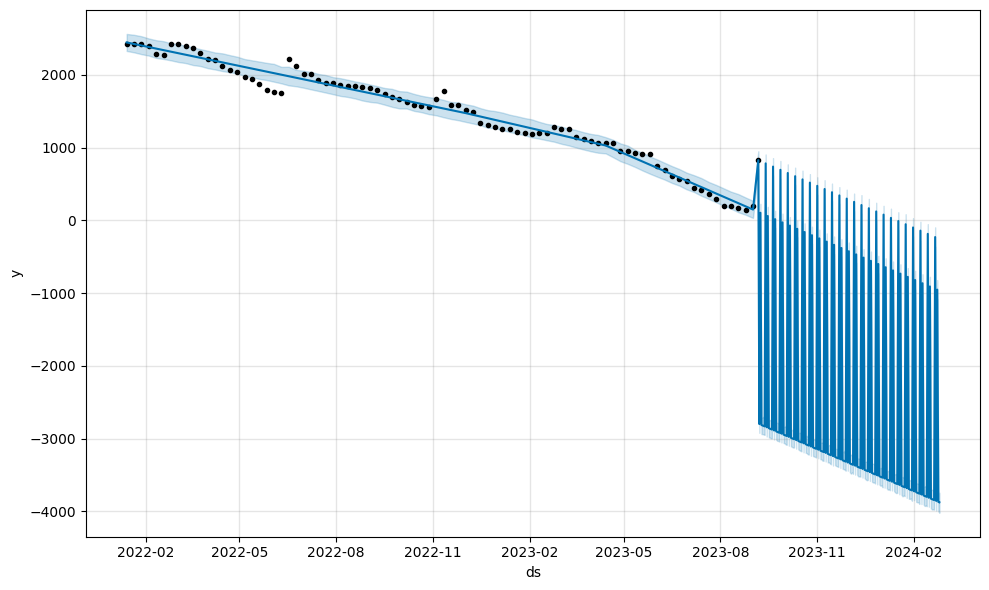

In [31]:
fig1 = m.plot(forecast)

/home/trainingmontage/dev/projects/barrios/.venv/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/trainingmontage/dev/projects/barrios/.venv/lib/python3.11/site-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/home/trainingmontage/dev/projects/barrios/.venv/lib/python3.11/site-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will

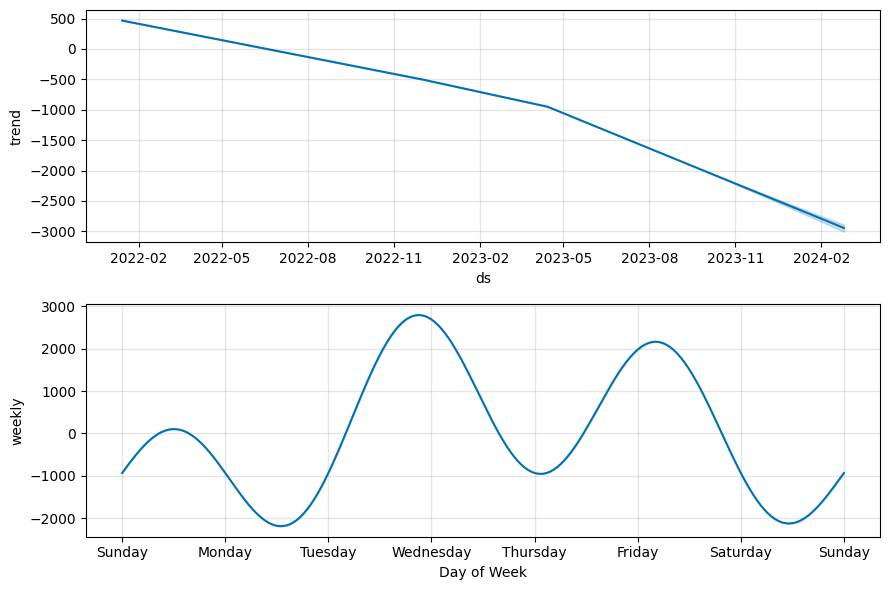

In [32]:
fig2 = m.plot_components(forecast)